In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/exercise-and-fitness-metrics-dataset/exercise_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor

# Dataset

In [3]:
df = pd.read_csv('/kaggle/input/exercise-and-fitness-metrics-dataset/exercise_dataset.csv')

In [4]:
df.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


# Pre-Processing and Visualization

In [5]:
df.drop('ID',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Exercise            3864 non-null   object 
 1   Calories Burn       3864 non-null   float64
 2   Dream Weight        3864 non-null   float64
 3   Actual Weight       3864 non-null   float64
 4   Age                 3864 non-null   int64  
 5   Gender              3864 non-null   object 
 6   Duration            3864 non-null   int64  
 7   Heart Rate          3864 non-null   int64  
 8   BMI                 3864 non-null   float64
 9   Weather Conditions  3864 non-null   object 
 10  Exercise Intensity  3864 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 332.2+ KB


In [7]:
df.describe()

,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,301.861806,75.139263,75.188440,39.621118,40.190994,139.777950,26.801977,5.457298
std,115.828604,14.545824,14.845511,12.521721,11.765957,23.447528,4.746745,2.850896
min,100.009403,50.001984,45.783747,18.000000,20.000000,100.000000,18.500014,1.000000
25%,202.168837,62.373585,62.476906,29.000000,30.000000,119.000000,22.686774,3.000000
50%,299.742508,75.522136,75.544407,40.000000,40.000000,140.000000,26.861656,5.000000
75%,404.143688,87.707989,88.105767,51.000000,51.000000,160.000000,30.950380,8.000000
max,499.859262,99.985355,104.309600,60.000000,60.000000,180.000000,34.996639,10.000000


In [8]:
df['Exercise'].unique()

array(['Exercise 2', 'Exercise 7', 'Exercise 4', 'Exercise 5',
       'Exercise 10', 'Exercise 1', 'Exercise 9', 'Exercise 8',
       'Exercise 6', 'Exercise 3'], dtype=object)

In [9]:
df.isna().sum()

Exercise              0
Calories Burn         0
Dream Weight          0
Actual Weight         0
Age                   0
Gender                0
Duration              0
Heart Rate            0
BMI                   0
Weather Conditions    0
Exercise Intensity    0
dtype: int64

In [10]:
df.rename(columns={'Weather Conditions':'Weather'},inplace=True)

In [11]:
df.head()

,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather,Exercise Intensity
0,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [12]:
df.groupby(by='Gender').mean() #we have grouped by using 'Gender' columns values and calculated mean values by it.

/tmp/ipykernel_20/2166523062.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Gender').mean() #we have grouped by using 'Gender' columns values and calculated mean values by it.


,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
Gender,,,,,,,,
Female,305.079815,75.388762,75.428577,39.929226,40.216904,139.099796,26.776949,5.471996
Male,298.535402,74.881360,74.940214,39.302632,40.164211,140.478947,26.827848,5.442105


In [13]:
df['Exercise'].value_counts()

Exercise 5     404
Exercise 1     403
Exercise 10    398
Exercise 8     397
Exercise 9     394
Exercise 7     386
Exercise 3     385
Exercise 6     381
Exercise 4     371
Exercise 2     345
Name: Exercise, dtype: int64

/tmp/ipykernel_20/1131278770.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='magma',annot=True,fmt='.3f') #we calculated correlation about df's informations and colorizied it with seaborn.


<Axes: >

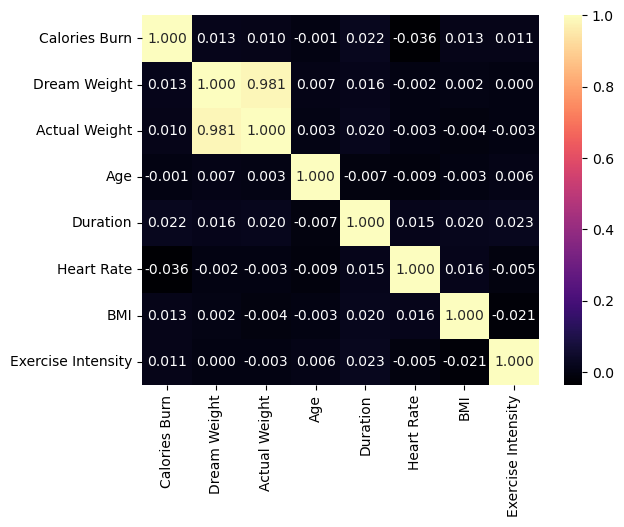

In [14]:
sns.heatmap(df.corr(),cmap='magma',annot=True,fmt='.3f') #we calculated correlation about df's informations and colorizied it with seaborn.

In [15]:
np.where(df['Age']==20) # we checked the 'Age' column's values where it is 20.

(array([   2,   35,   65,  178,  233,  321,  347,  415,  427,  429,  484,
         494,  501,  532,  593,  663,  673,  677,  742,  760,  787,  812,
         843,  853,  883,  934,  953,  965,  987, 1018, 1021, 1048, 1081,
        1082, 1109, 1114, 1270, 1493, 1533, 1557, 1592, 1604, 1608, 1616,
        1626, 1737, 1786, 1799, 1951, 2018, 2041, 2119, 2140, 2154, 2160,
        2188, 2217, 2227, 2291, 2319, 2321, 2324, 2353, 2368, 2371, 2412,
        2425, 2439, 2500, 2698, 2708, 2776, 2834, 2836, 2850, 2860, 2907,
        2910, 3170, 3411, 3444, 3469, 3502, 3647, 3670, 3719, 3749, 3801,
        3853, 3859]),)

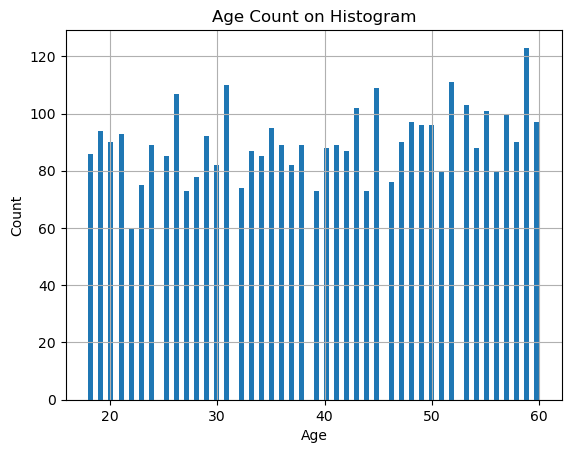

In [16]:
df['Age'].hist(bins=90)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Count on Histogram')
plt.show()

In this histogram graph, we compare the counts of ages.

/tmp/ipykernel_20/4052891312.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(df.groupby(by='Gender').mean().index,df.groupby(by='Gender').mean().iloc[:,0],width=0.2)
/tmp/ipykernel_20/4052891312.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(df.groupby(by='Gender').mean().index,df.groupby(by='Gender').mean().iloc[:,0],width=0.2)


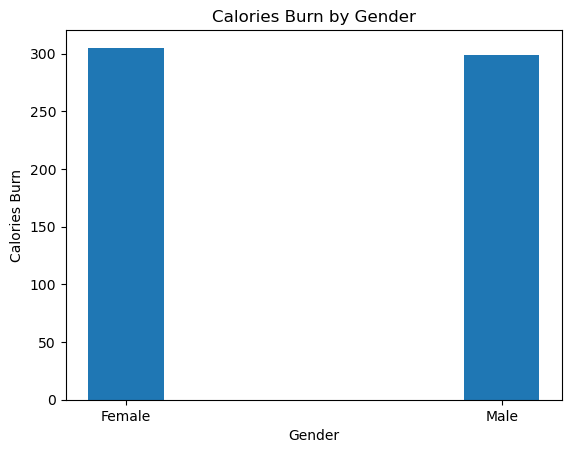

In [17]:
plt.bar(df.groupby(by='Gender').mean().index,df.groupby(by='Gender').mean().iloc[:,0],width=0.2)
plt.xlabel('Gender')
plt.ylabel('Calories Burn')
plt.title('Calories Burn by Gender')
plt.show()

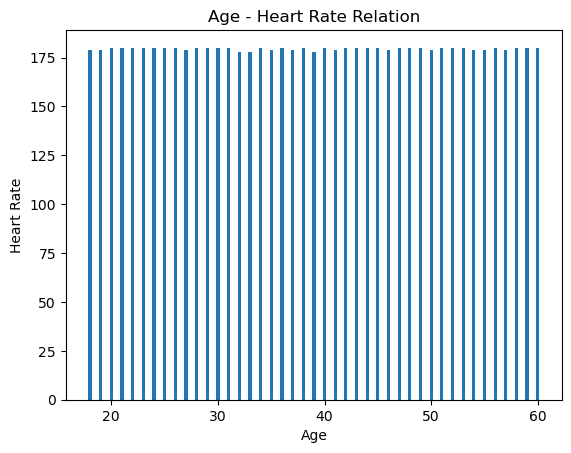

In [18]:
plt.bar(df['Age'],df['Heart Rate'],width=0.3)
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Age - Heart Rate Relation')
plt.show()

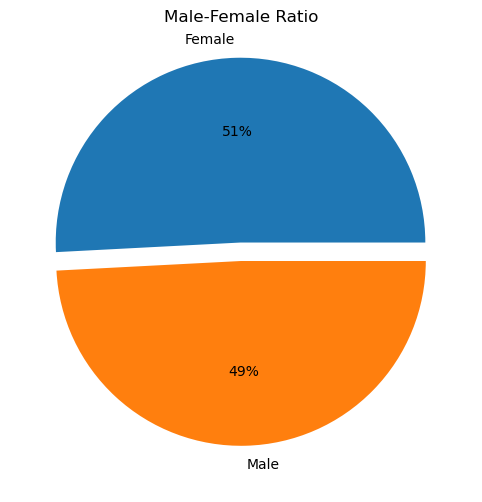

In [19]:
plt.figure(figsize=(12,6))
plt.pie(df["Gender"].value_counts().values,labels=df["Gender"].value_counts().index,autopct="%1.0f%%",explode=(0.1,0))
plt.title("Male-Female Ratio")
plt.show()

In this DF, female subjects are majority.

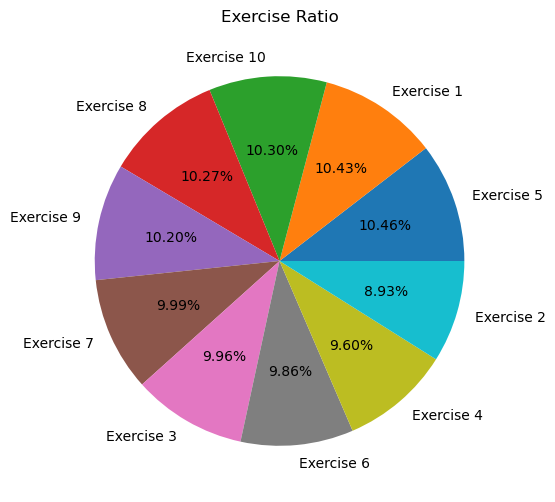

In [20]:
plt.figure(figsize=(12,6))
plt.pie(df["Exercise"].value_counts().values,labels=df["Exercise"].value_counts().index,autopct="%.02f%%")
plt.title("Exercise Ratio")
plt.show()

In [21]:
df.groupby(by='Age').mean().head()

/tmp/ipykernel_20/2382623975.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Age').mean().head()


,Calories Burn,Dream Weight,Actual Weight,Duration,Heart Rate,BMI,Exercise Intensity
Age,,,,,,,
18,295.008797,74.278790,74.638901,38.069767,135.988372,27.757458,5.186047
19,313.298650,73.198034,72.847620,42.478723,143.223404,27.020834,4.670213
20,304.050345,77.553701,77.470319,38.355556,140.333333,26.684299,5.888889
21,306.575217,75.702047,75.840851,40.784946,139.860215,26.825321,5.419355
22,314.764680,74.555833,74.470249,43.333333,142.233333,26.397697,5.966667


/tmp/ipykernel_20/2677477124.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(df.groupby(by='Age').mean().index,df.groupby(by='Age').mean().iloc[:,1],label='Dream Weight')
/tmp/ipykernel_20/2677477124.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(df.groupby(by='Age').mean().index,df.groupby(by='Age').mean().iloc[:,1],label='Dream Weight')
/tmp/ipykernel_20/2677477124.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be 

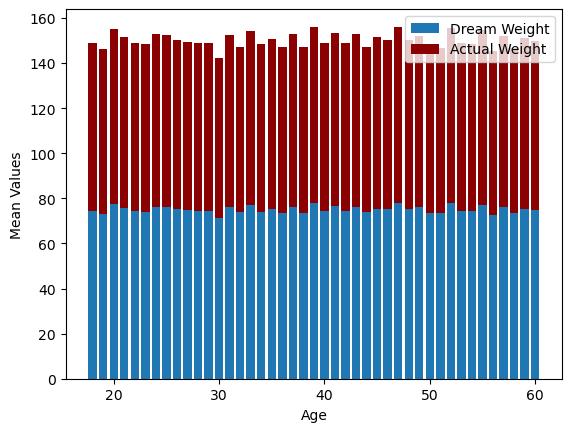

In [22]:
plt.bar(df.groupby(by='Age').mean().index,df.groupby(by='Age').mean().iloc[:,1],label='Dream Weight')
plt.bar(df.groupby(by='Age').mean().index,df.groupby(by='Age').mean().iloc[:,2],color='darkred',label='Actual Weight',bottom=df.groupby(by='Age').mean().iloc[:,1])
plt.xlabel('Age')
plt.ylabel('Mean Values')
plt.legend()
plt.show()

/tmp/ipykernel_20/253475954.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.groupby(by='Age').mean().index,df.groupby(by='Age').mean().iloc[:,1],label='Dream Weight')
/tmp/ipykernel_20/253475954.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.groupby(by='Age').mean().index,df.groupby(by='Age').mean().iloc[:,1],label='Dream Weight')
/tmp/ipykernel_20/253475954.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be v

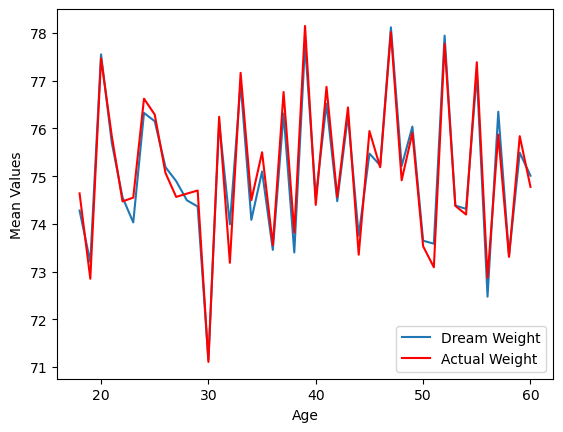

In [23]:
plt.plot(df.groupby(by='Age').mean().index,df.groupby(by='Age').mean().iloc[:,1],label='Dream Weight')
plt.plot(df.groupby(by='Age').mean().index,df.groupby(by='Age').mean().iloc[:,2],color='r',label='Actual Weight')
plt.xlabel('Age')
plt.ylabel('Mean Values')
plt.legend()
plt.show()

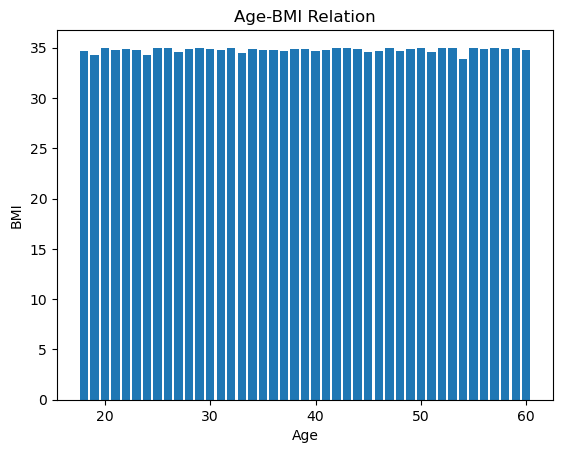

In [24]:
plt.bar(df['Age'].sort_values(),df['BMI'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age-BMI Relation')
plt.show()

In [25]:
GE=df.groupby(by=["Gender","Exercise"]).mean()

/tmp/ipykernel_20/453420233.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  GE=df.groupby(by=["Gender","Exercise"]).mean()


In [26]:
GE.style.background_gradient(axis=None,vmax=38,vmin=30,cmap="viridis")

In [27]:
df.head()

,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather,Exercise Intensity
0,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


/tmp/ipykernel_20/2036085772.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.scatter(df.groupby(by='Exercise').mean().iloc[:,0], df.groupby(by='Exercise').mean().iloc[:,6],color='blue',marker='x')
/tmp/ipykernel_20/2036085772.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.scatter(df.groupby(by='Exercise').mean().iloc[:,0], df.groupby(by='Exercise').mean().iloc[:,6],color='blue',marker='x')


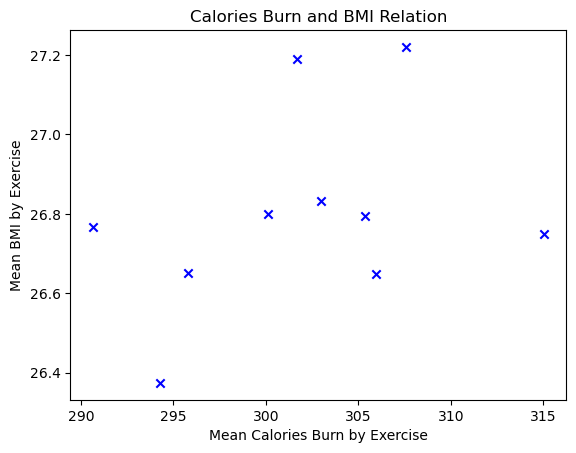

In [28]:
plt.scatter(df.groupby(by='Exercise').mean().iloc[:,0], df.groupby(by='Exercise').mean().iloc[:,6],color='blue',marker='x')
plt.xlabel("Mean Calories Burn by Exercise")
plt.ylabel("Mean BMI by Exercise")
plt.title('Calories Burn and BMI Relation')
plt.show()

/tmp/ipykernel_20/787568580.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.scatter(df.groupby(by='Exercise').mean().iloc[:,0], df.groupby(by='Exercise').mean().iloc[:,2],  color='red',marker='s')
/tmp/ipykernel_20/787568580.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.scatter(df.groupby(by='Exercise').mean().iloc[:,0], df.groupby(by='Exercise').mean().iloc[:,2],  color='red',marker='s')


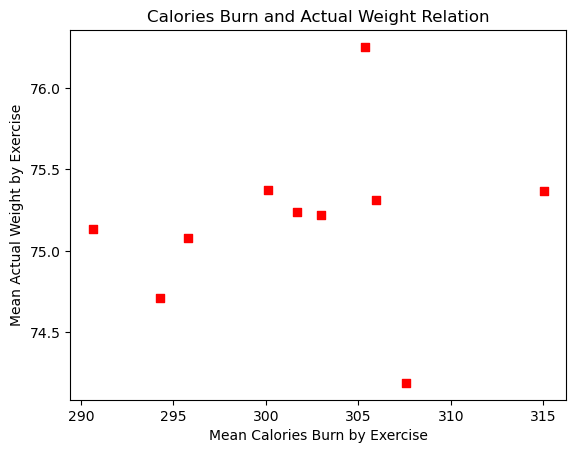

In [29]:
plt.scatter(df.groupby(by='Exercise').mean().iloc[:,0], df.groupby(by='Exercise').mean().iloc[:,2],  color='red',marker='s')
plt.xlabel("Mean Calories Burn by Exercise")
plt.ylabel("Mean Actual Weight by Exercise")
plt.title('Calories Burn and Actual Weight Relation')
plt.show()

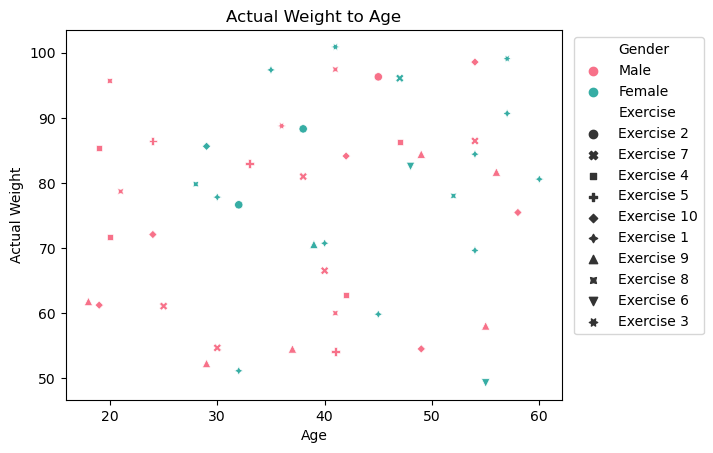

In [30]:
ssp = sns.scatterplot(data=df.head(50),x="Age",y="Actual Weight",hue="Gender",palette="husl",style='Exercise')
plt.title("Actual Weight to Age") 
sns.move_legend(ssp,loc="upper left",bbox_to_anchor=(1.01, 1))

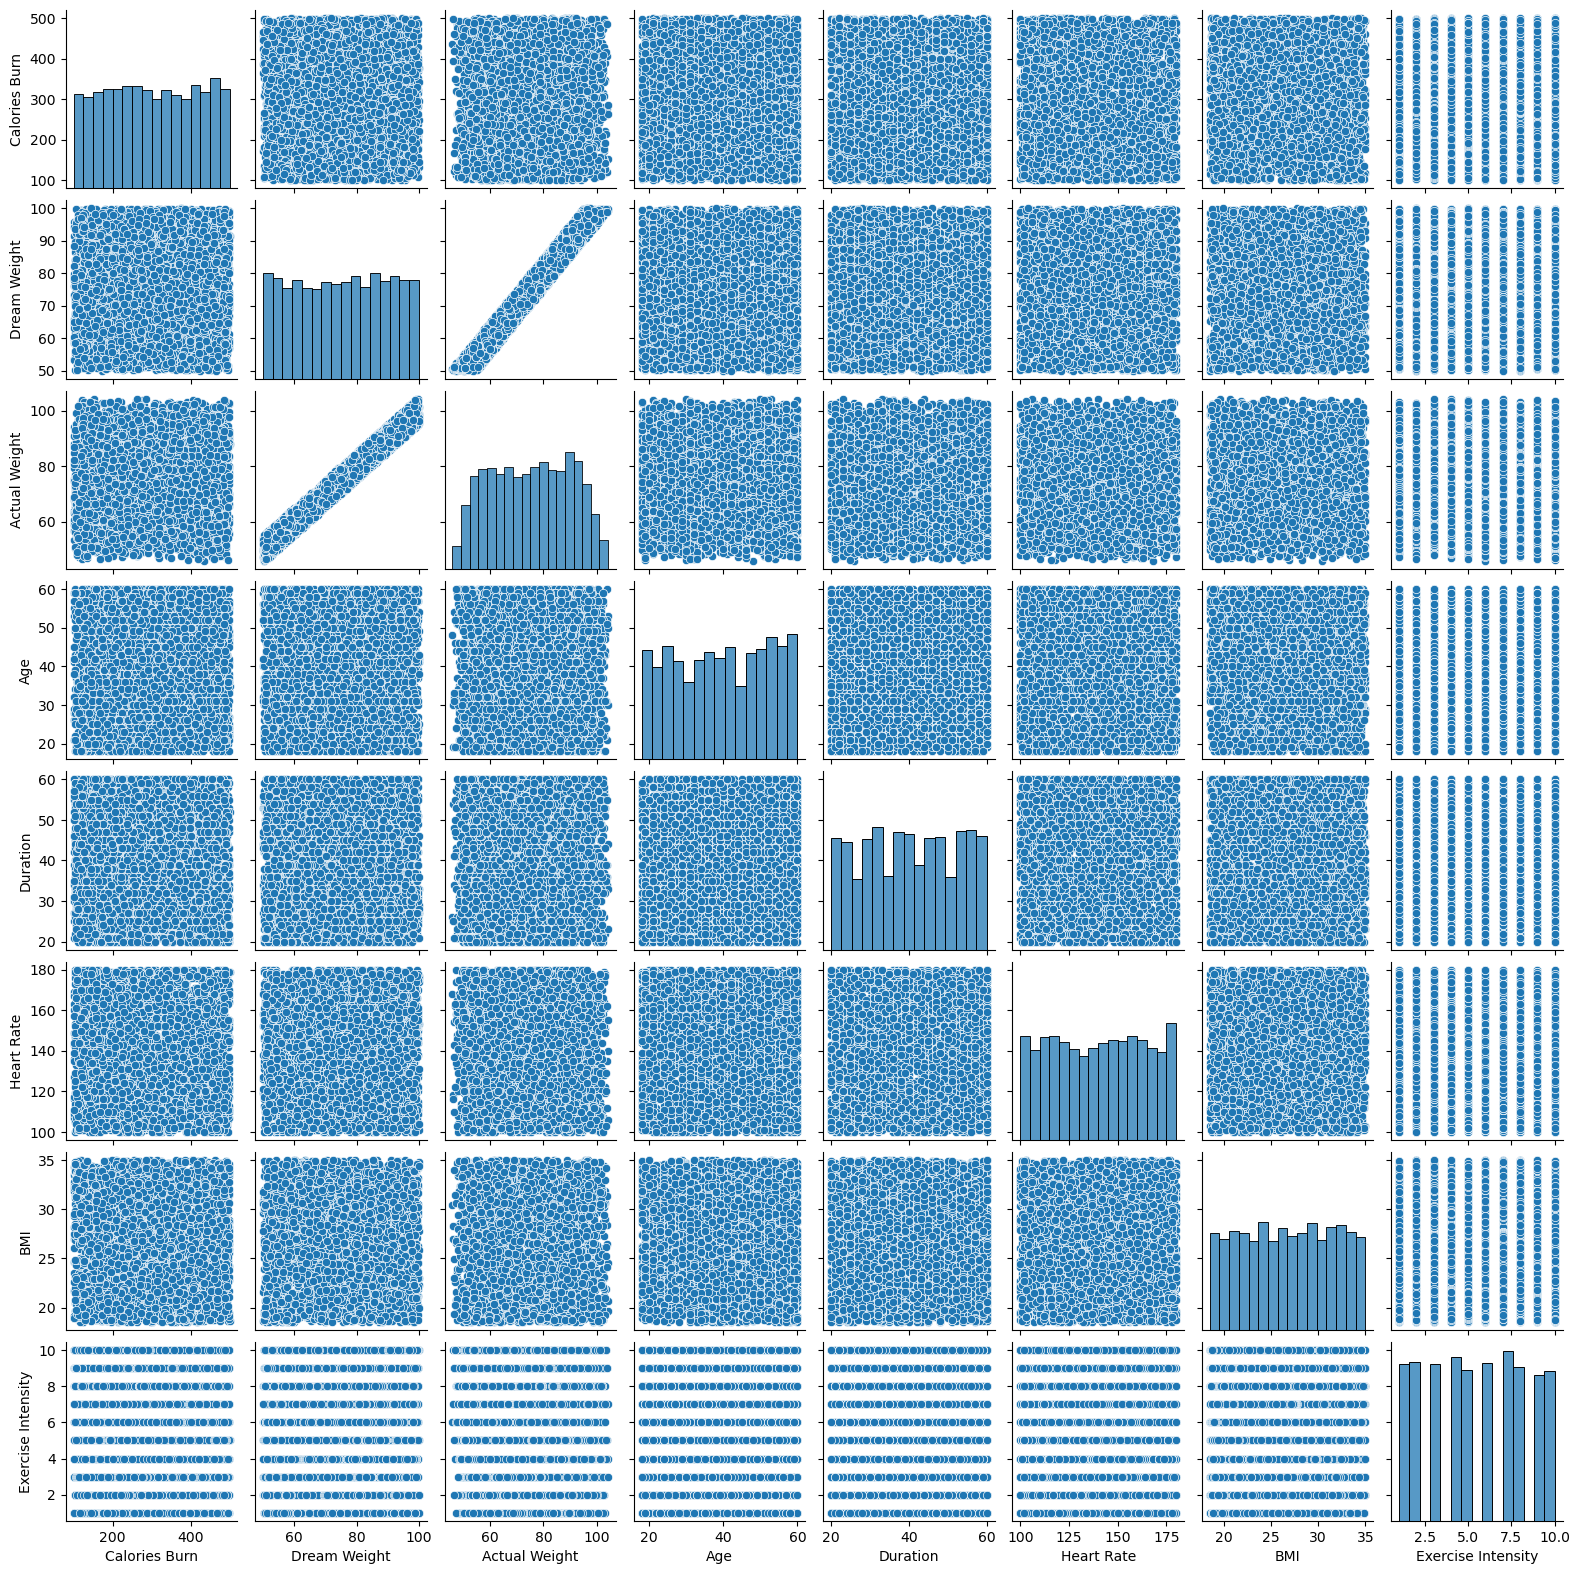

In [31]:
sns.pairplot(data = df, height = 2) 

In [32]:
df1 = pd.get_dummies(df,columns={'Gender','Weather','Exercise'},drop_first=True)

/tmp/ipykernel_20/3972082111.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df1 = pd.get_dummies(df,columns={'Gender','Weather','Exercise'},drop_first=True)


In [33]:
df1.head()

,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity,Weather_Rainy,Weather_Sunny,Exercise_Exercise 10,Exercise_Exercise 2,Exercise_Exercise 3,Exercise_Exercise 4,Exercise_Exercise 5,Exercise_Exercise 6,Exercise_Exercise 7,Exercise_Exercise 8,Exercise_Exercise 9,Gender_Male
0,286.959851,91.892531,96.301115,45,37,170,29.426275,5,1,0,0,1,0,0,0,0,0,0,0,1
1,343.453036,64.165097,61.104668,25,43,142,21.286346,5,1,0,0,0,0,0,0,0,1,0,0,1
2,261.223465,70.846224,71.766724,20,20,148,27.899592,4,0,0,0,0,0,1,0,0,0,0,0,1
3,127.183858,79.477008,82.984456,33,39,170,33.729552,10,0,1,0,0,0,0,1,0,0,0,0,1
4,416.318374,89.960226,85.643174,29,34,118,23.286113,3,0,0,1,0,0,0,0,0,0,0,0,0


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Calories Burn         3864 non-null   float64
 1   Dream Weight          3864 non-null   float64
 2   Actual Weight         3864 non-null   float64
 3   Age                   3864 non-null   int64  
 4   Duration              3864 non-null   int64  
 5   Heart Rate            3864 non-null   int64  
 6   BMI                   3864 non-null   float64
 7   Exercise Intensity    3864 non-null   int64  
 8   Weather_Rainy         3864 non-null   uint8  
 9   Weather_Sunny         3864 non-null   uint8  
 10  Exercise_Exercise 10  3864 non-null   uint8  
 11  Exercise_Exercise 2   3864 non-null   uint8  
 12  Exercise_Exercise 3   3864 non-null   uint8  
 13  Exercise_Exercise 4   3864 non-null   uint8  
 14  Exercise_Exercise 5   3864 non-null   uint8  
 15  Exercise_Exercise 6  

# Train and Test

In [35]:
x1 = df1.drop('Actual Weight',axis=1)
y1 = df1['Actual Weight']

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=11)

# Modelling by LinearRegression

In [37]:
reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_score = model.score(x_test,y_test)
y_score

0.9639775760708388

In [38]:
model.intercept_ # we call the constant term.

0.8891934610070535

In [39]:
model.coef_ #we call independent variables's coefficents.

array([-7.81233275e-05,  1.00114960e+00, -5.07836710e-03,  2.85523613e-03,
        4.58226529e-04, -2.23414292e-02, -1.22891489e-02, -5.46882094e-02,
        5.27212953e-02, -4.06524234e-01, -1.91365411e-01, -2.98692608e-01,
       -2.90810409e-01, -2.14804067e-01,  2.62429914e-02, -4.97826631e-02,
       -3.22675978e-01, -5.02029196e-01, -2.18750448e-02])

In [40]:
y_pred = model.predict(x_test)

# Modelling by KNN

In [41]:
knn = KNeighborsRegressor(n_neighbors=8)
model2 = knn.fit(x_train,y_train)

In [42]:
model2.score(x_test,y_test)

0.9015453585640112

In [43]:
y_pred2 = model2.predict(x_test)

# Statsmodels

In [44]:
lm = sm.OLS(y_train, x_train)

In [45]:
sts = lm.fit()
sts.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Actual Weight   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.165e+05
Date:                Thu, 08 Jun 2023   Prob (F-statistic):                        0.00
Time:                        13:47:59   Log-Likelihood:                         -7629.8
No. Observations:                3091   AIC:                                  1.530e+04
Df Residuals:                    3072   BIC:                                  1.541e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Calories Burn         6.165e-05      0.000      0.142      0.887      -0.001       0.001
Dream Weight             1.0034      0.003    314.341      0.000       0.997       1.010
Age                     -0.0034      0.004     -0.860      0.390      -0.011       0.004
Duration                 0.0046      0.004      1.084      0.278      -0.004       0.013
Heart Rate               0.0021      0.002      1.138      0.255      -0.002       0.006
BMI                     -0.0146      0.009     -1.535      0.125      -0.033       0.004
Exercise Intensity      -0.0080      0.018     -0.445      0.656      -0.043       0.027
Weather_Rainy           -0.0376      0.125     -0.300      0.764      -0.284       0.208
Weather_Sunny            0.0690      0.126      0.548      0.584      -0.178       0.316
Exercise_Exercise 10    -0.3389      0.220     -1.542      0.123      -0.770       0.092
Exercise_Exercise 2     -0.1312      0.229     -0.572      0.567      -0.581       0.318
Exercise_Exercise 3     -0.2431      0.225     -1.081      0.280      -0.684       0.198
Exercise_Exercise 4     -0.2375      0.226     -1.053      0.292      -0.680       0.205
Exercise_Exercise 5     -0.1626      0.220     -0.738      0.461      -0.595       0.269
Exercise_Exercise 6      0.0834      0.225      0.370      0.711      -0.358       0.525
Exercise_Exercise 7      0.0006      0.223      0.002      0.998      -0.436       0.438
Exercise_Exercise 8     -0.2756      0.223     -1.236      0.217      -0.713       0.162
Exercise_Exercise 9     -0.4435      0.221     -2.006      0.045      -0.877      -0.010
Gender_Male             -0.0090      0.103     -0.087      0.931      -0.211       0.193
==============================================================================
Omnibus:                     2213.371   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.151
Skew:                          -0.012   Prob(JB):                     7.60e-40
Kurtosis:                       1.818   Cond. No.                     3.40e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
sts.summary().tables[0]

Dep. Variable:,Actual Weight,R-squared (uncentered):,0.999
Model:,OLS,Adj. R-squared (uncentered):,0.999
Method:,Least Squares,F-statistic:,1.165e+05
Date:,"Thu, 08 Jun 2023",Prob (F-statistic):,0.00
Time:,13:47:59,Log-Likelihood:,-7629.8
No. Observations:,3091,AIC:,1.530e+04
Df Residuals:,3072,BIC:,1.541e+04
Df Model:,19,,
Covariance Type:,nonrobust,,


# Validation for LinearRegression

In [47]:
np.sqrt(mean_squared_error(y_train,model.predict(x_train)))

2.8550525775636406

In [48]:
np.sqrt(mean_squared_error(y_test,model.predict(x_test)))

2.807157488984963

In [49]:
cross_val_score(model, x1, y1, cv=10, scoring='r2').mean()

0.9628182532145317

In [50]:
cross_val_score(model, x_train, y_train, cv=10, scoring='r2').mean()

0.9624233697104912

In [51]:
np.sqrt(-cross_val_score(model, x_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

2.8739026015288713

In [52]:
np.sqrt(-cross_val_score(model, x_test, y_test, cv=10, scoring='neg_mean_squared_error')).mean()

2.8366308062409997

# Validation for KNN

In [53]:
np.sqrt(mean_squared_error(y_train,model2.predict(x_train)))

4.191643744029955

In [54]:
np.sqrt(mean_squared_error(y_test,model2.predict(x_test)))

4.640859380563619

In [55]:
cross_val_score(model2, x1, y1, cv=10, scoring='r2').mean()

0.9020799003407409

In [56]:
cross_val_score(model2, x_train, y_train, cv=10, scoring='r2').mean()

0.8925868424168744

In [57]:
np.sqrt(-cross_val_score(model2, x_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

4.861538108424108

In [58]:
np.sqrt(-cross_val_score(model2, x_test, y_test, cv=10, scoring='neg_mean_squared_error')).mean()

6.3765629663782715

In [59]:
x_train.shape

(3091, 19)

In [60]:
y_train.shape

(3091,)

In [61]:
x_test.shape

(773, 19)

In [62]:
y_test.shape

(773,)

In [63]:
y_pred.shape

(773,)

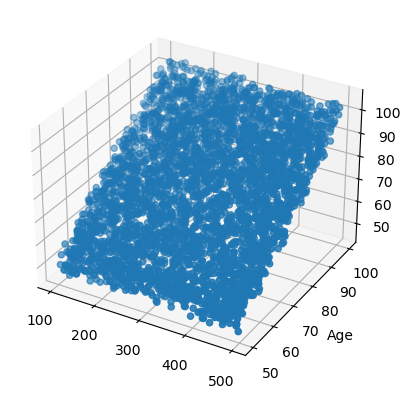

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.iloc[:, 0], x1.iloc[:, 1], y1)
ax.set_ylabel('Age')
plt.show()

<Axes: xlabel='Actual Weight'>

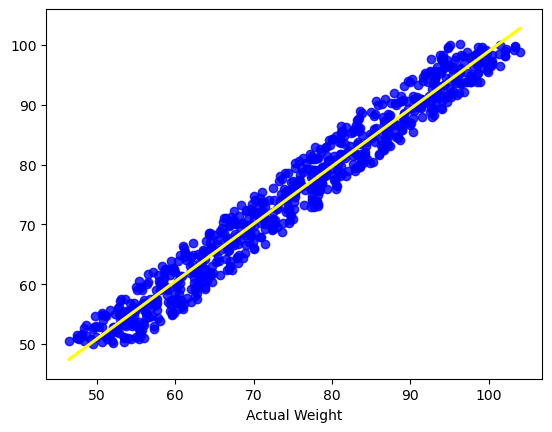

In [65]:
sns.regplot(x=y_test,y=y_pred,scatter_kws={"color": "blue"}, line_kws={"color": "yellow"})